# Assignment 2: Call Center Data Modeling

In [21]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
waiting_times_day = np.loadtxt('call_center.csv')
waiting_times_per_hour = [[] for _ in range(24)]
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

## Likelihood Function

Our data is best modeled by an exponential distribution, with parameter $\lambda$. Exponential distributions are often used to model time elapsed between events. They are also continuous and their support is non-negative, which fits the requirements for waiting time. This is evidenced by the histogram below, in which the distribution of waiting times is plotted.

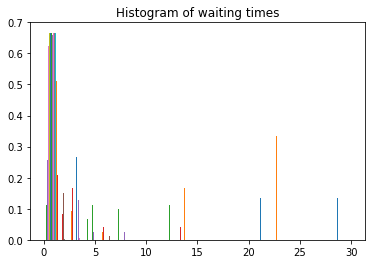

In [25]:
plt.hist(waiting_times_per_hour,  bins = 20, density=True)
plt.title('Histogram of waiting times')
plt.show()

## Prior Distribution

Using a conjugate prior would make calculating the posterior much easier, as well as being useful to identify what the posterior distribution looks like. The conjugate prior for an exponential likelihood is the gamma distribution; it makes sense to estimate $\lambda$ using a gamma distribution because gamma models continuous variables that are always positive and have skewed distributions; this is the case of $\lambda$, which is the average time between events and which should be greater than zero and right skewed.

Given our prior knowledge, we can use $\alpha$ = 1 and $\beta$ = 0.25.

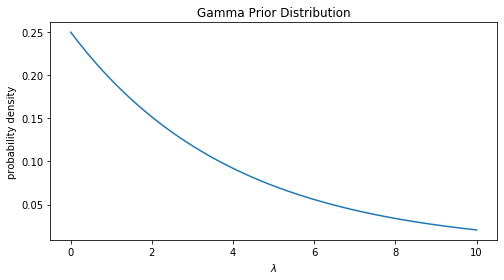

In [30]:
alpha_0 = 1
beta_0 = 0.25

prior = sts.gamma(a=alpha_0, scale=1/beta_0)

plt.figure(figsize=(8, 4))
x = np.linspace(0, 10)
plt.plot(x, prior.pdf(x))
plt.ylabel('probability density')
plt.xlabel('$\lambda$')
plt.title('Gamma Prior Distribution')
plt.show()

## Posterior Distribution

Our posterior hyperparameters are given by $\alpha$+$n$ and $\beta$ + $\sum_{i=1}^n x_i$, and our distribution is also a gamma distribution.

Because we want to tell our client how many calls to expect throughout the day, we must calculate the posterior hyperparameters for each hour.

In [73]:
alpha_1 = []
beta_1 = []

for i in range(len(waiting_times_per_hour)):
    alpha_1.append(alpha_0 + len(waiting_times_per_hour[i])) 
    beta_1.append(beta_0 + sum(waiting_times_per_hour[i]))

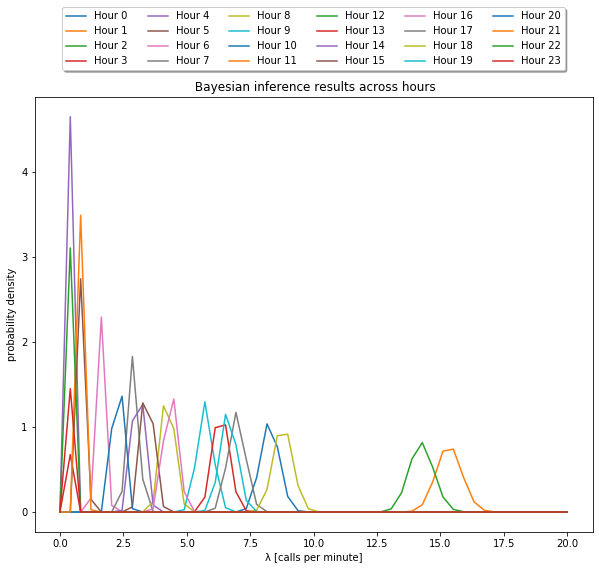

In [74]:
post_hyper = []

plt.figure(figsize=(10, 8))
for i in range(len(waiting_times_per_hour)):
    post_hyper.append(sts.gamma(a=alpha_1[i], scale=1/beta_1[i]))
    x = np.linspace(0, 20)
    plt.plot(x, post_hyper[i].pdf(x), label= f'Hour {i}')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f' Bayesian inference results across hours')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=6, fancybox=True, shadow=True)
plt.show()

## 98% posterior confidence interval

Our expected value of the call rate for each hour is the mean of our posterior distribution.

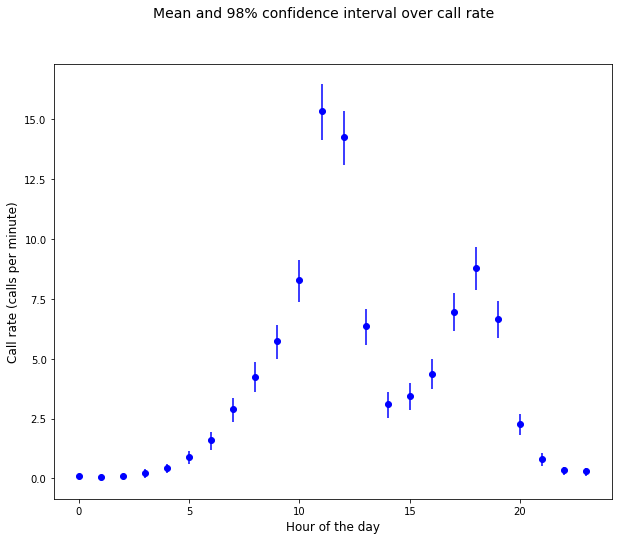

In [88]:
mean = []

# determining the mean and confidence intervals
for i in range(len(post_hyper)):
    mean.append(post_hyper[i].mean())

upper = []
lower = []

# setting the 1st/99th percentile bounds for our confidence interval
for i in range(len(distribution)):
    upper.append(post_hyper[i].ppf(0.99)-mean[i])
    lower.append(mean[i]-post_hyper[i].ppf(0.01))

plt.figure(figsize=(10,8))
x = range(24)
y = mean
error = upper, lower
plt.errorbar(x,y,error,fmt='bo')
plt.suptitle('Mean and 98% confidence interval over call rate', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Call rate (calls per minute)', fontsize=12)
plt.show()